# KNN

In [34]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn import neighbors
import matplotlib.pyplot as plt
names = ['letter','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar',
         'y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']

# dataset
dataset = pd.read_csv("letter-recognition.data",names = names)

In [35]:
# splitting into X and y
X = dataset.drop("letter", axis = 1)
y = dataset['letter']

In [36]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model):
    model.fit(X_train, y_train)
    x_train_prediction = model.predict(X_train)
    x_test_prediction = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, x_train_prediction)
    test_accuracy = accuracy_score(y_test, x_test_prediction)
    clf_report = classification_report(y_test, x_test_prediction)
    print(f'Train set accuracy: {train_accuracy:.2f}')
    print(f'Test set accuracy: {test_accuracy:.2f}' + '\n')
    print(clf_report + '\n')

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
evaluate(model)

Train set accuracy: 0.97
Test set accuracy: 0.94

              precision    recall  f1-score   support

           A       0.96      1.00      0.98       136
           B       0.84      0.96      0.89       143
           C       0.98      0.96      0.97       159
           D       0.87      0.97      0.92       159
           E       0.87      0.95      0.91       150
           F       0.90      0.94      0.92       142
           G       0.94      0.92      0.93       148
           H       0.86      0.81      0.83       154
           I       0.95      0.96      0.96       141
           J       0.96      0.93      0.95       149
           K       0.89      0.87      0.88       178
           L       0.99      0.97      0.98       168
           M       0.97      0.96      0.96       157
           N       0.95      0.94      0.95       151
           O       0.94      0.94      0.94       138
           P       0.96      0.90      0.93       178
           Q       0.95      0.

In [39]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=2)
  
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_

In [40]:
# cv results
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009358,0.002166,0.034151,0.001323,1,{'n_neighbors': 1},0.938750,0.949375,0.946562,0.946875,0.950000,0.946313,0.004014,1
1,0.010522,0.000397,0.034984,0.001055,2,{'n_neighbors': 2},0.917500,0.932813,0.929688,0.930312,0.931875,0.928438,0.005580,9
2,0.008723,0.001325,0.034687,0.001153,3,{'n_neighbors': 3},0.933438,0.937813,0.940000,0.940937,0.945937,0.939625,0.004081,2
3,0.008294,0.001346,0.034883,0.001076,4,{'n_neighbors': 4},0.932500,0.937187,0.941875,0.936875,0.938438,0.937375,0.003014,4
4,0.008328,0.001341,0.035229,0.001114,5,{'n_neighbors': 5},0.931875,0.934688,0.942500,0.940312,0.941250,0.938125,0.004113,3
5,0.009282,0.001451,0.035043,0.001339,6,{'n_neighbors': 6},0.927500,0.927813,0.940312,0.935937,0.943125,0.934937,0.006372,6
6,0.009754,0.002130,0.037094,0.000991,7,{'n_neighbors': 7},0.930000,0.928438,0.942187,0.937187,0.939063,0.935375,0.005297,5
7,0.008924,0.001970,0.038101,0.001159,8,{'n_neighbors': 8},0.933125,0.923750,0.937813,0.935937,0.937813,0.933688,0.005257,7
8,0.009411,0.001914,0.039118,0.001742,9,{'n_neighbors': 9},0.930000,0.922813,0.932500,0.935937,0.937813,0.931813,0.005249,8


In [41]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [42]:
model = KNeighborsClassifier(**grid_search.best_params_)
evaluate(model)

Train set accuracy: 1.00
Test set accuracy: 0.95

              precision    recall  f1-score   support

           A       0.96      1.00      0.98       136
           B       0.89      0.94      0.92       143
           C       0.99      0.98      0.98       159
           D       0.90      0.97      0.93       159
           E       0.91      0.92      0.92       150
           F       0.93      0.94      0.93       142
           G       0.96      0.93      0.94       148
           H       0.91      0.82      0.86       154
           I       0.94      0.96      0.95       141
           J       0.95      0.95      0.95       149
           K       0.87      0.89      0.88       178
           L       0.99      0.98      0.98       168
           M       0.99      0.96      0.98       157
           N       0.97      0.96      0.96       151
           O       0.94      0.96      0.95       138
           P       0.95      0.92      0.93       178
           Q       0.97      0.

[0.94925 0.9345  0.9405  0.9365  0.93775 0.93475 0.9355  0.9315  0.931  ]


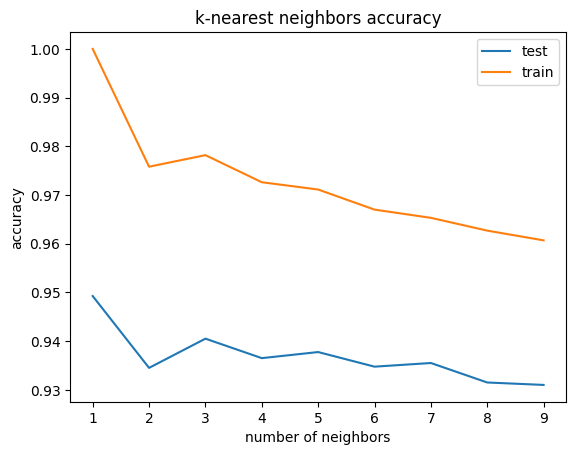

In [49]:
no_neighbors = np.arange(1, 10, 1)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_accuracy[i] = model.score(X_train, y_train)
    test_accuracy[i] = model.score(X_test, y_test)
print(test_accuracy)
plt.title('k-nearest neighbors accuracy')
plt.plot(no_neighbors, test_accuracy, label='test')
plt.plot(no_neighbors, train_accuracy, label='train')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.savefig("knn.png")
plt.show()